# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

state = RandomState(12345)

In [ ]:
data_0 =  pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv') 
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


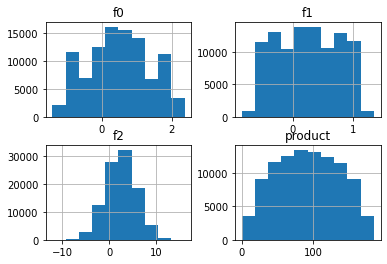

In [ ]:
data_0.info()
print(data_0.head())
data_0.hist();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


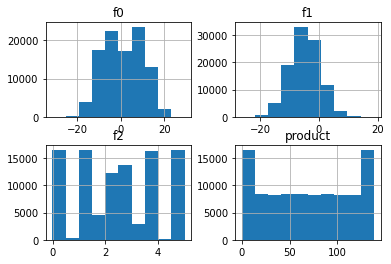

In [ ]:
data_1.info()
print(data_1.head())
data_1.hist();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


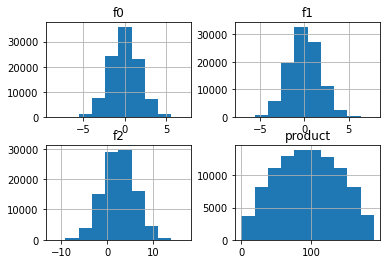

In [ ]:
data_2.info()
print(data_2.head())
data_2.hist();

**Вывод:** 3 файла содержат данные по 10 000 пробам нефти, каждый из которых описывается 5 признаками (4 количественных и 1 категориальных). Пропущенных значений нет. данные не нуждаются в предварительной обработке.

## Обучение и проверка модели

Разобьем данные на обучающую и валидационную выбрки в соотношении 3:1 соответственно. Выделим целевой признак.

In [ ]:
df_train_0, df_valid_0 = train_test_split(data_0, test_size=0.25, random_state=12345)
df_train_1, df_valid_1 = train_test_split(data_1, test_size=0.25, random_state=12345)
df_train_2, df_valid_2 = train_test_split(data_2, test_size=0.25, random_state=12345)

features_train_0 = df_train_0.drop(['product','id'],axis=1)
target_train_0 = df_train_0['product']
features_train_1 = df_train_1.drop(['product','id'],axis=1)
target_train_1 = df_train_1['product']
features_train_2 = df_train_2.drop(['product','id'],axis=1)
target_train_2 = df_train_2['product']

features_valid_0 = df_valid_0.drop(['product','id'],axis=1)
target_valid_0 = df_valid_0['product']
features_valid_1 = df_valid_1.drop(['product','id'],axis=1)
target_valid_1 = df_valid_1['product']
features_valid_2 = df_valid_2.drop(['product','id'],axis=1)
target_valid_2 = df_valid_2['product']

print(features_train_0.shape)
print(features_train_1.shape)
print(features_train_2.shape)
print(target_train_0.shape)
print(target_train_1.shape)
print(target_train_2.shape)
print(features_valid_0.shape)
print(features_valid_1.shape)
print(features_valid_2.shape)
print(target_valid_0.shape)
print(target_valid_1.shape)
print(target_valid_2.shape)

(75000, 3)
(75000, 3)
(75000, 3)
(75000,)
(75000,)
(75000,)
(25000, 3)
(25000, 3)
(25000, 3)
(25000,)
(25000,)
(25000,)


Обучим модели с помощью линейной регресии.

In [ ]:
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

In [ ]:
model_0.fit(features_train_0,target_train_0)
model_1.fit(features_train_1,target_train_1)
model_2.fit(features_train_2,target_train_2)

LinearRegression()

Предскажем количество продукта для валидационной выборки, найдем средний запас предсказанного сырья и RMSE модели.

In [ ]:
predicted_valid_0 = model_0.predict(features_valid_0)
predicted_valid_1 = model_1.predict(features_valid_1)
predicted_valid_2 = model_2.predict(features_valid_2)

mse_0 = mean_squared_error(target_valid_0,predicted_valid_0)
rmse_0 = mse_0 ** 0.5
print('Model 0 rmse:', rmse_0)
print('Model 0 mean predicted:', predicted_valid_0.mean())
print('Model 0 mean true:', target_valid_0.mean())

mse_1 = mean_squared_error(target_valid_1,predicted_valid_1)
rmse_1 = mse_1 ** 0.5
print('Model 1 rmse:', rmse_1)
print('Model 1 mean predicted:', predicted_valid_1.mean())
print('Model 1 mean true:', target_valid_1.mean())

mse_2 = mean_squared_error(target_valid_2,predicted_valid_2)
rmse_2 = mse_2 ** 0.5
print('Model 2 rmse:', rmse_2)
print('Model 2 mean predicted:', predicted_valid_2.mean())
print('Model 2 mean true:', target_valid_2.mean())

Model 0 rmse: 37.5794217150813
Model 0 mean predicted: 92.59256778438035
Model 0 mean true: 92.07859674082927
Model 1 rmse: 0.893099286775617
Model 1 mean predicted: 68.728546895446
Model 1 mean true: 68.72313602435997
Model 2 rmse: 40.02970873393434
Model 2 mean predicted: 94.96504596800489
Model 2 mean true: 94.88423280885438


Известно, что чем ниже RMSE, тем лучше. Таким образом, у первого и третьего региона достаточно большое среднеквадратичная ошибка, тогда как у второго региона она близка к нулю. Это означает, что модель предсказывает наиболее близкие к правильным ответы.

**Вывод:** данные были разбиты на обучающие и тестовые выборки, были обучены модели с помощью линейного регрессии и произведена их оценка.

## Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [ ]:
PRICE = 450 #цена за один баррель сырья
BARRELS= 1000 # объем баррелей
BUDGET = 10000000000 #бюджет на разработку скважин в регионе
ALL_WELL_NUMBERS = 500 #количество исследуемых точек
BEST_WELL_NUMBERS = 200 #количество лучших точек, выбранных с помощью машинного обучения

# достаточный объём сырья для безубыточной разработки новой скважины
sufficient_volume = BUDGET / (PRICE * BARRELS * BEST_WELL_NUMBERS)
sufficient_volume

111.11111111111111

**Вывод:** был определен необходимиый минимум сырья в каждой из 200 выбранных скважин. Он бльше, чем среднее значение, которое было предсказано выше, но предсказанное количество делилось между 25 000 точками. Таким образом, отбор меньшего количства точек с наибольшем предсказанным объемомо продукта обоснован.

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [ ]:
target_valid_0 = pd.Series(target_valid_0).reset_index(drop=True)
target_valid_1 = pd.Series(target_valid_1).reset_index(drop=True)
target_valid_2 = pd.Series(target_valid_2).reset_index(drop=True)

In [ ]:
predicted_valid_0 = pd.Series(predicted_valid_0)
predicted_valid_1 = pd.Series(predicted_valid_1)
predicted_valid_2 = pd.Series(predicted_valid_2)

In [ ]:
def profitable_well(target, prediction):
    samples = prediction.sample(n=all_well_number, random_state=state)
    best_predictions = samples.sort_values(ascending=False)[:best_well_numbers] # Выберим скважины с максимальными значениями предсказаний
    best_wells = target[best_predictions.index] 
    common_volume = best_wells.sum() # Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
    profit = common_volume * price * barrels - budget # Рассчитаем прибыль для полученного объёма сырья
    return profit

## Расчёт прибыли и рисков 

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли и 95%-доверительный интервал. Для этого напишем функцию.

In [ ]:
def risks (target, predictions):
    bstrsmpl = 1000 # количество выборок
    alpha = 0.05 #порог для обпределения доверительного интервала
    
    profits =[]
    for i in range(bstrsmpl):
        profit = profitable_well(target, predictions)
        profits.append(profit)
        
    profits = pd.Series(profits)
    profits_mean = profits.mean()
    
    left_confidence_interval = profits.quantile(alpha/2) #нижний порог доверительного интервала
    right_confidence_interval = profits.quantile(1-alpha/2) #верхний порог доверительного интервала
    
              
    risk = sum(profits < 0) * 100 / bstrsmpl
    
    print(f'Средняя прибыль в регионе: {profits_mean} млрд. руб.')
    print(f'2,5%-квантиль: {left_confidence_interval} млрд. руб.')
    print(f'97,5%-квантиль: {right_confidence_interval} млрд. руб.')
    print(f'Риск убытка: {risk}%')
    return 

In [ ]:
risks(target_valid_0, predicted_valid_0)

Средняя прибыль в регионе: 377125173.91322047 млрд. руб.
2,5%-квантиль: -136550085.2169606 млрд. руб.
97,5%-квантиль: 907783093.784694 млрд. руб.
Риск убытка: 7.4%


In [ ]:
risks(target_valid_1, predicted_valid_1)

Средняя прибыль в регионе: 451340621.4063827 млрд. руб.
2,5%-квантиль: 79500066.86412978 млрд. руб.
97,5%-квантиль: 837299294.0769546 млрд. руб.
Риск убытка: 1.0%


In [ ]:
risks(target_valid_2, predicted_valid_2)

Средняя прибыль в регионе: 398475090.07520163 млрд. руб.
2,5%-квантиль: -150166734.15211362 млрд. руб.
97,5%-квантиль: 918929361.5729996 млрд. руб.
Риск убытка: 7.4%


**Вывод**
По заданию необходимо оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. По полученным данным такой риск есть только у второго региона.

## Вывод

В данном проекте рассматривались пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Было необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

3 предоставленных файла содержат данные по 10 000 пробам нефти, каждый из которых описывается 5 признаками (4 количественных и 1 категориальных). Пропущенных значений не было обнаружено. Данные не подвергались предварительной обработке.

Данные были разбиты на обучающие и тестовые выборки, были обучены модели с помощью линейного регрессии и произведена их оценка, найдены средние предсказанные значение и RMSE.

Был определен необходимиый минимум сырья в каждой из 200 выбранных скважин. Он больше, чем среднее значение, которое было предсказано выше, но предсказанное количество делилось между 25 000 точками. Таким образом, отбор меньшего количества точек с наибольшим предсказанным объемом продукта обоснован.



Средняя прибыль в регионе №1:  377125174 руб.
2,5%-квантиль: -136550085 руб.
97,5%-квантиль: 907783094 руб.
Риск убытка: 7.4%

Средняя прибыль в регионе №2: 451340621  руб.
2,5%-квантиль: 79500067 руб.
97,5%-квантиль: 837299294 руб.
Риск убытка: 1.0%

Средняя прибыль в регионе №3:398475090 руб.
2,5%-квантиль: -150166734 руб.
97,5%-квантиль: 918929361 руб.
Риск убытка: 7.4%

По предварительному условию необходимо оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. По полученным данным такой риск есть только у второго региона.